In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


## Homework 4

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


In this homework, we will use the Car price dataset like last week. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:



We'll work with the `MSRP` variable, and we'll transform it to a classification task. 

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`
* `MSRP`


### Data preparation

* Keep only the columns above
* Lowercase the column names and replace spaces with underscores
* Fill the missing values with 0 
* Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable `above_average`

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`


In [21]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
full_data = pd.read_csv(url)
full_data.shape

(11914, 16)

In [22]:
selected_columns = [ 'Make',
                     'Model',
                     'Year',
                     'Engine HP',
                     'Engine Cylinders',
                     'Transmission Type',
                     'Vehicle Style',
                     'highway MPG',
                     'city mpg',
                     'MSRP']

In [23]:
data = full_data[selected_columns].copy()
data.columns = data.columns.str.replace(' ', '_').str.lower()

data = data.fillna(0)


mean_price = data['msrp'].mean()

data['above_average'] = (data.msrp >= mean_price).astype(int)

del data['msrp']

data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1


In [24]:
SEED = 1

df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(data) == (len(df_train) + len(df_val) + len(df_test))

In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']



### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the `above_average` variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `engine_hp`



0 0 0
engine_hp 0.9171031265539011
1 0 1
engine_cylinders 0.766116490165669
2 1 0
highway_mpg 0.6330587871772013
3 1 1
city_mpg 0.6734244643245233


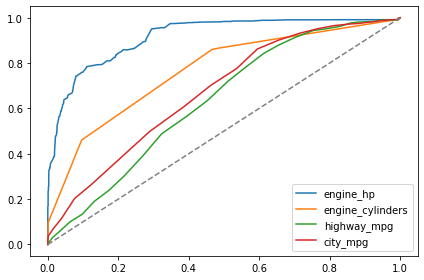

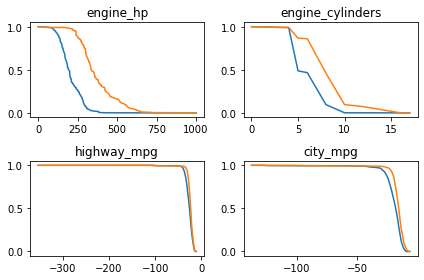

In [26]:
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

score_columns = [   'engine_hp',
                    'engine_cylinders',
                    'highway_mpg',
                    'city_mpg', ]


fig, ax = plt.subplots()


fig2, ax2 = plt.subplots(2,2)


for idx, col in enumerate(score_columns):

    fpr, tpr, tresholds = roc_curve(y_train, df_train[col])
    
    auc = roc_auc_score(y_train, df_train[col])
    fpr, tpr, tresholds = roc_curve(y_train, df_train[col])

    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[col])
        fpr, tpr, tresholds = roc_curve(y_train, -df_train[col])


    print(idx, idx//2, idx%2)

    # ax[idx//2, idx%2].plot(fpr, tpr)
    ax.plot(fpr, tpr, label=col)
    # ax[idx//2, idx%2].plot(tresholds, tpr)
    # ax[idx//2, idx%2].set_title(col)

    ax2[idx//2, idx%2].plot(tresholds, fpr)
    ax2[idx//2, idx%2].plot(tresholds, tpr)
    ax2[idx//2, idx%2].set_title(col)


    print(col, auc)

ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
ax.legend()

fig.tight_layout()
fig2.tight_layout()

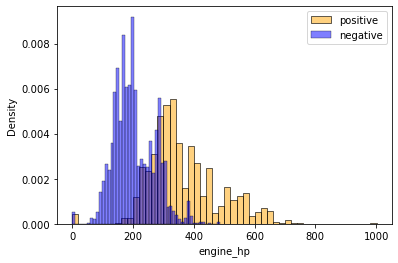

In [27]:
import seaborn as sns

sns.histplot(df_train.engine_hp[y_train == 1],
             stat='density', bins=50,
             color='orange', alpha=0.5,
             label='positive')
sns.histplot(df_train.engine_hp[y_train == 0],
             stat='density', bins=50,
             color='blue', alpha=0.5,
             label='negative')

plt.legend()
plt.show()



### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)


- 0.979



In [28]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [29]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]

In [30]:
roc_auc_score(y_val, y_pred)

0.9765654432482052

In [31]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27
1,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18
2,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19
3,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17
4,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17
...,...,...,...,...,...,...,...,...,...
7143,Subaru,Impreza,2015,148.0,4.0,MANUAL,4dr Hatchback,33,24
7144,Infiniti,QX50,2016,325.0,6.0,AUTOMATIC,4dr SUV,24,17
7145,Honda,Fit,2017,130.0,4.0,AUTOMATIC,4dr Hatchback,37,32
7146,Audi,200,1991,162.0,5.0,AUTOMATIC,Sedan,20,16



### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.48



In [32]:
start = 0
end =1.0
step = 0.01

tresholds = np.arange(start,end+step,step)
tresholds



array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [33]:
scores = []

start = 0
end =1.0
step = 0.01
# treshold = 0.5
tresholds = np.arange(start,end+step,step)

for treshold in tresholds:

    actual_positive = (y_val==1)
    actual_negative = (y_val==0)

    predict_positive = (y_pred >= treshold)
    predict_negative = (y_pred < treshold)

    tp = (predict_positive & actual_positive).sum() #true positive
    tn = (predict_negative & actual_negative).sum() #true negative

    fp = (predict_positive & actual_negative).sum() #false positive: Predicts positive but is a negative
    fn = (predict_negative & actual_positive).sum() #false negative: Predicts negative but is a positive

    scores.append((treshold, tp, fp, fn ,tn ))

# precission = tp / (tp + fp)
# recall     = tp / (tp + fn)

columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['precission'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall']     = df_scores.tp / (df_scores.tp + df_scores.fn)
# precission, recall
df_scores

,threshold,tp,fp,fn,tn,precission,recall
0,0.00,654,1729,0,0,0.274444,1.000000
1,0.01,652,839,2,890,0.437290,0.996942
2,0.02,651,680,3,1049,0.489106,0.995413
3,0.03,651,592,3,1137,0.523733,0.995413
4,0.04,650,543,4,1186,0.544845,0.993884
...,...,...,...,...,...,...,...
96,0.96,255,1,399,1728,0.996094,0.389908
97,0.97,237,1,417,1728,0.995798,0.362385
98,0.98,211,0,443,1729,1.000000,0.322630
99,0.99,181,0,473,1729,1.000000,0.276758


<AxesSubplot:xlabel='threshold'>

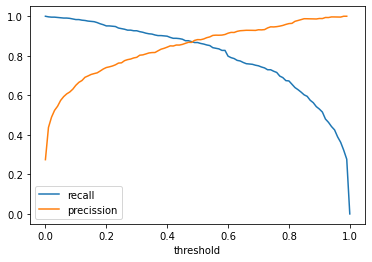

In [34]:
ax = df_scores.plot(x='threshold', y='recall')
df_scores.plot(x='threshold', y='precission', ax=ax)



In [35]:
df_scores['diff'] = (df_scores['recall'] - df_scores['precission']).abs()

df_scores.query('diff == diff.min()')

,threshold,tp,fp,fn,tn,precission,recall,diff
48,0.48,570,87,84,1642,0.86758,0.87156,0.00398




### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.52



In [46]:
df_scores['f1_score'] = 2*(df_scores['precission']*df_scores['recall'])/(df_scores['precission']+df_scores['recall'])

In [47]:
df_scores

,threshold,tp,fp,fn,tn,precission,recall,diff,f1_score
0,0.00,654,1729,0,0,0.274444,1.000000,0.725556,0.430688
1,0.01,652,839,2,890,0.437290,0.996942,0.559651,0.607925
2,0.02,651,680,3,1049,0.489106,0.995413,0.506307,0.655919
3,0.03,651,592,3,1137,0.523733,0.995413,0.471680,0.686347
4,0.04,650,543,4,1186,0.544845,0.993884,0.449039,0.703844
...,...,...,...,...,...,...,...,...,...
96,0.96,255,1,399,1728,0.996094,0.389908,0.606185,0.560440
97,0.97,237,1,417,1728,0.995798,0.362385,0.633413,0.531390
98,0.98,211,0,443,1729,1.000000,0.322630,0.677370,0.487861
99,0.99,181,0,473,1729,1.000000,0.276758,0.723242,0.433533


0.12 0.7992518703241895
0.32 0.8579586009992862
0.52 0.8719937936384793
0.72 0.824232081911263


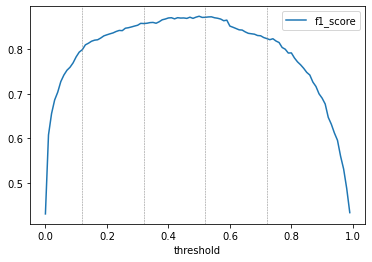

In [54]:
ax = df_scores.plot(x='threshold', y='f1_score')



df_scores.query('f1_score == f1_score.max()')['threshold'].iloc[0]

q_thr = [ 0.12, 0.32, 0.52, 0.72]

for thr in q_thr:
    f1_s = df_scores.query('threshold == @thr')['f1_score'].iloc[0]
    ax.axvline(thr, c='gray', ls='--', lw=0.5)
    print(thr, f1_s)

In [55]:
q_thr = [ 0.12, 0.32, 0.52, 0.72]

for thr in q_thr:
    f1_s = df_scores.query('threshold == @thr')['f1_score'].iloc[0]

    print(thr, f1_s)

0.12 0.7992518703241895
0.32 0.8579586009992862
0.52 0.8719937936384793
0.72 0.824232081911263



### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard devidation of the scores across different folds?

- 0.003
- 0.030
- 0.090
- 0.140



In [56]:
from sklearn.model_selection import KFold

In [61]:
columns = list(data.columns)
columns.remove('above_average')
columns

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg']

In [63]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer()
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [64]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.978 +- 0.001



### Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.01, 0.1, 0.5, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.01
- 0.1
- 0.5
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.


In [65]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 0.5, 10]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01, 0.952 +- 0.002
C= 0.1, 0.972 +- 0.001
C= 0.5, 0.978 +- 0.003
C=  10, 0.981 +- 0.002




## Submit the results

- Submit your results here: https://forms.gle/E7Fa3WuBw3HkPQYg6
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is October 9 (Monday), 23:00 CET. After that the form will be closed.
